In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [149]:
Customer = pd.read_csv(r"D:\Data Science\Project\Fintech\Customer_Table.csv", encoding='latin-1')
Loan = pd.read_csv(r"D:\Data Science\Project\Fintech\Loan_Table.csv", encoding='latin-1')

In [150]:
Customer.head()

,Customer_ID,Name,DOB,Gender,Marital_Status,Dependents_count,Education,Occupation_type,Monthly_income,City,State,KYC_Status,Credit_score,Fraud_Risk_Flag
0,CUST100000,Charlotte Garcia,3/31/2002,Female,Single,1,High School,Salaried,12998,Hyderabad,Telangana,Verified,639,Low
1,CUST100001,Amelia Martinez,9/14/2005,Male,Single,0,Graduate,Salaried,16375,Pune,Maharashtra,Verified,347,Low
2,CUST100002,Emma Lopez,5/22/2004,Female,Single,2,Graduate,Student,21998,Pune,Maharashtra,Pending,744,Low
3,CUST100003,Olivia Perez,8/4/2003,Other,Married,2,Graduate,Business,52252,Pune,Maharashtra,Verified,472,Low
4,CUST100004,Ava Smith,12/7/2000,Female,Divorced,0,Professional,Salaried,65347,Pune,Maharashtra,Verified,481,Low


In [151]:
Loan.head()

,Application_id,Customer_ID,Application_Date,Loan_type,Loan_Amount,Loan_Status,Processing_Fee,Tenure_months,Interest_Rate,EMI_amount,Credit_score,Collateral_flag,Disbursement_date,Default_flag
0,APP200000,CUST100000,5/26/2020,Business,1102652,Approved,22053.04,48.0,0.08,20724.57,857,Yes,1/29/2021,0.0
1,APP200001,CUST100001,9/15/2024,Auto,3208217,Approved,32082.17,36.0,0.08,76018.74,855,No,12/29/2024,0.0
2,APP200002,CUST100002,8/5/2021,Home,347813,Approved,3478.13,36.0,0.19,9955.05,402,Yes,1/8/2024,1.0
3,APP200003,CUST100003,10/27/2024,Personal,3051747,Rejected,NaN,NaN,NaN,NaN,892,No,NaN,NaN
4,APP200004,CUST100004,8/17/2023,Home,3076714,Approved,30767.14,180.0,0.15,41019.21,454,No,1/24/2024,0.0


In [152]:
df = Loan.merge(Customer, on="Customer_ID", how="left")

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Application_id     1500 non-null   object 
 1   Customer_ID        1500 non-null   object 
 2   Application_Date   1500 non-null   object 
 3   Loan_type          1500 non-null   object 
 4   Loan_Amount        1500 non-null   int64  
 5   Loan_Status        1500 non-null   object 
 6   Processing_Fee     1150 non-null   float64
 7   Tenure_months      1150 non-null   float64
 8   Interest_Rate      1150 non-null   float64
 9   EMI_amount         1150 non-null   float64
 10  Credit_score_x     1500 non-null   int64  
 11  Collateral_flag    1500 non-null   object 
 12  Disbursement_date  1150 non-null   object 
 13  Default_flag       1150 non-null   float64
 14  Name               1500 non-null   object 
 15  DOB                1500 non-null   object 
 16  Gender             1500 

In [154]:
df.describe()

,Loan_Amount,Processing_Fee,Tenure_months,Interest_Rate,EMI_amount,Credit_score_x,Default_flag,Dependents_count,Monthly_income,Credit_score_y
count,1.500000e+03,1150.000000,1150.000000,1150.000000,1150.000000,1500.000000,1150.00000,1500.000000,1500.000000,1500.000000
mean,2.537980e+06,34461.858557,90.688696,0.136477,72615.248676,606.046667,0.07913,1.496667,49149.624667,601.426667
std,1.424167e+06,23504.956495,77.329079,0.038884,73664.994065,171.479752,0.27006,1.118402,63648.062673,172.297865
min,5.407500e+04,610.540000,12.000000,0.019000,551.260000,300.000000,0.00000,0.000000,9000.000000,300.000000
25%,1.262260e+06,16476.600000,36.000000,0.100000,24747.057617,464.000000,0.00000,0.000000,16235.750000,454.500000
50%,2.517044e+06,31198.780000,60.000000,0.140000,50733.380000,607.500000,0.00000,1.000000,23093.500000,602.000000
75%,3.778505e+06,45546.930000,180.000000,0.170000,89799.187740,759.000000,0.00000,2.000000,49711.250000,754.000000
max,4.994912e+06,99859.280000,240.000000,0.200000,432262.380000,899.000000,1.00000,3.000000,299055.000000,899.000000


In [155]:
df.drop(0,inplace=True)

In [156]:
df.isnull().sum()

Application_id         0
Customer_ID            0
Application_Date       0
Loan_type              0
Loan_Amount            0
Loan_Status            0
Processing_Fee       350
Tenure_months        350
Interest_Rate        350
EMI_amount           350
Credit_score_x         0
Collateral_flag        0
Disbursement_date    350
Default_flag         350
Name                   0
DOB                    0
Gender                 0
Marital_Status         0
Dependents_count       0
Education              0
Occupation_type        0
Monthly_income         0
City                   0
State                  0
KYC_Status             0
Credit_score_y         0
Fraud_Risk_Flag        0
dtype: int64

In [157]:
df['DOB'] = pd.to_datetime(df['DOB'])
df['Age'] = (pd.Timestamp.today() - df['DOB']).dt.days // 365
df

,Application_id,Customer_ID,Application_Date,Loan_type,Loan_Amount,Loan_Status,Processing_Fee,Tenure_months,Interest_Rate,EMI_amount,...,Dependents_count,Education,Occupation_type,Monthly_income,City,State,KYC_Status,Credit_score_y,Fraud_Risk_Flag,Age
1,APP200001,CUST100001,9/15/2024,Auto,3208217,Approved,32082.17,36.0,0.08,76018.74000,...,0,Graduate,Salaried,16375,Pune,Maharashtra,Verified,347,Low,20
2,APP200002,CUST100002,8/5/2021,Home,347813,Approved,3478.13,36.0,0.19,9955.05000,...,2,Graduate,Student,21998,Pune,Maharashtra,Pending,744,Low,21
3,APP200003,CUST100003,10/27/2024,Personal,3051747,Rejected,NaN,NaN,NaN,NaN,...,2,Graduate,Business,52252,Pune,Maharashtra,Verified,472,Low,22
4,APP200004,CUST100004,8/17/2023,Home,3076714,Approved,30767.14,180.0,0.15,41019.21000,...,0,Professional,Salaried,65347,Pune,Maharashtra,Verified,481,Low,25
5,APP200005,CUST100005,5/3/2022,Education,1224937,Approved,12249.37,120.0,0.09,18961.38000,...,1,Post Graduate,Salaried,98253,Bengaluru,Karnataka,eKYC,605,Low,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,APP201495,CUST101495,11/14/2024,Education,4796658,Approved,47966.58,240.0,0.15,63161.89286,...,0,Professional,Self-Employed,13574,Chennai,Tamil Nadu,Verified,712,Low,20
1496,APP201496,CUST101496,12/28/2024,Personal,3109280,Rejected,NaN,NaN,NaN,NaN,...,2,Post Graduate,Salaried,27181,Chennai,Tamil Nadu,Verified,404,Low,24
1497,APP201497,CUST101497,7/12/2022,Home,3273910,Approved,32739.10,36.0,0.15,113491.16560,...,3,Professional,Self-Employed,19794,Chennai,Tamil Nadu,Verified,607,Low,23
1498,APP201498,CUST101498,3/15/2024,Education,3547065,Rejected,NaN,NaN,NaN,NaN,...,2,Professional,Self-Employed,9963,Chennai,Tamil Nadu,eKYC,799,Low,20


In [158]:
df['Approved'] = (df['Loan_Status'] == "Approved").astype(int)  #Approval Flag (binary)
df['Approved']

1       1
2       1
3       0
4       1
5       1
       ..
1495    1
1496    0
1497    1
1498    0
1499    1
Name: Approved, Length: 1499, dtype: int64

In [159]:
df['Application_Date'] = pd.to_datetime(df['Application_Date'])
df['Application_Month'] = df['Application_Date'].dt.month
df['Application_Year'] = df['Application_Date'].dt.year

In [160]:
df['Tenure_months'] = df.apply(lambda x: x['Tenure_months'] if x['Loan_Status']=="Approved" else 0, axis=1)
df['EMI_amount'] = df.apply(lambda x: x['EMI_amount'] if x['Loan_Status']=="Approved" else 0, axis=1)
df['Interest_Rate'] = df.apply(lambda x: x['Interest_Rate'] if x['Loan_Status']=="Approved" else 0, axis=1)

In [161]:
df

,Application_id,Customer_ID,Application_Date,Loan_type,Loan_Amount,Loan_Status,Processing_Fee,Tenure_months,Interest_Rate,EMI_amount,...,Monthly_income,City,State,KYC_Status,Credit_score_y,Fraud_Risk_Flag,Age,Approved,Application_Month,Application_Year
1,APP200001,CUST100001,2024-09-15,Auto,3208217,Approved,32082.17,36.0,0.08,76018.74000,...,16375,Pune,Maharashtra,Verified,347,Low,20,1,9,2024
2,APP200002,CUST100002,2021-08-05,Home,347813,Approved,3478.13,36.0,0.19,9955.05000,...,21998,Pune,Maharashtra,Pending,744,Low,21,1,8,2021
3,APP200003,CUST100003,2024-10-27,Personal,3051747,Rejected,NaN,0.0,0.00,0.00000,...,52252,Pune,Maharashtra,Verified,472,Low,22,0,10,2024
4,APP200004,CUST100004,2023-08-17,Home,3076714,Approved,30767.14,180.0,0.15,41019.21000,...,65347,Pune,Maharashtra,Verified,481,Low,25,1,8,2023
5,APP200005,CUST100005,2022-05-03,Education,1224937,Approved,12249.37,120.0,0.09,18961.38000,...,98253,Bengaluru,Karnataka,eKYC,605,Low,25,1,5,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,APP201495,CUST101495,2024-11-14,Education,4796658,Approved,47966.58,240.0,0.15,63161.89286,...,13574,Chennai,Tamil Nadu,Verified,712,Low,20,1,11,2024
1496,APP201496,CUST101496,2024-12-28,Personal,3109280,Rejected,NaN,0.0,0.00,0.00000,...,27181,Chennai,Tamil Nadu,Verified,404,Low,24,0,12,2024
1497,APP201497,CUST101497,2022-07-12,Home,3273910,Approved,32739.10,36.0,0.15,113491.16560,...,19794,Chennai,Tamil Nadu,Verified,607,Low,23,1,7,2022
1498,APP201498,CUST101498,2024-03-15,Education,3547065,Rejected,NaN,0.0,0.00,0.00000,...,9963,Chennai,Tamil Nadu,eKYC,799,Low,20,0,3,2024


In [162]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include="object").columns

In [163]:
num_cols

Index(['Loan_Amount', 'Processing_Fee ', 'Tenure_months', 'Interest_Rate',
       'EMI_amount', 'Credit_score_x', 'Default_flag', 'Dependents_count',
       'Monthly_income', 'Credit_score_y', 'Age', 'Approved',
       'Application_Month', 'Application_Year'],
      dtype='object')

In [164]:
cat_cols

Index(['Application_id', 'Customer_ID', 'Loan_type', 'Loan_Status',
       'Collateral_flag', 'Disbursement_date', 'Name', 'Gender',
       'Marital_Status', 'Education', 'Occupation_type', 'City', 'State',
       'KYC_Status', 'Fraud_Risk_Flag'],
      dtype='object')

In [165]:
target = "Approved" if "Approved" in df.columns else "Loan_Status"

print(f"\n===== TARGET BALANCE ({target}) =====")
print(df[target].value_counts())


===== TARGET BALANCE (Approved) =====
Approved
1    1149
0     350
Name: count, dtype: int64


# Loan Type Distribution

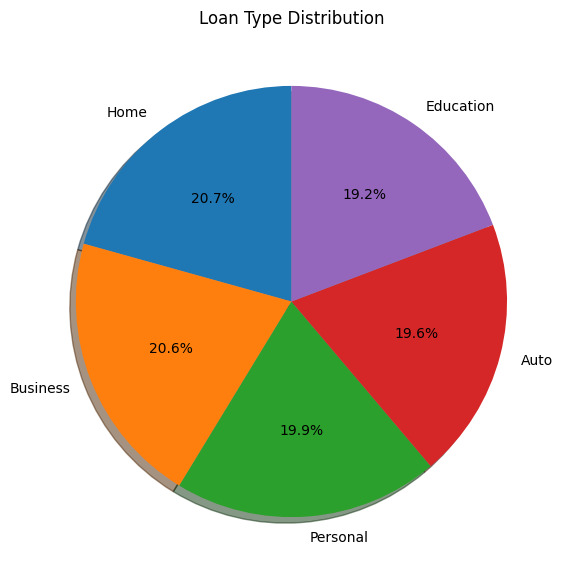

In [166]:
plt.figure(figsize=(7,7))
df['Loan_type'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
plt.title("Loan Type Distribution")
plt.ylabel("")
plt.show()


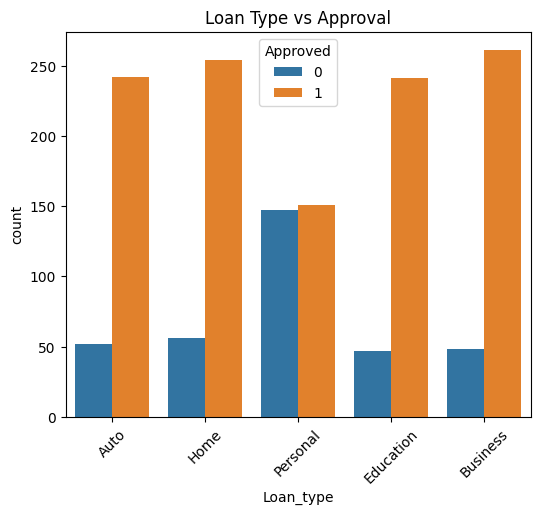

In [167]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="Loan_type", hue=target)
plt.title("Loan Type vs Approval")
plt.xticks(rotation=45)
plt.show()

In [168]:
df['Loan_Income_Ratio'] = df['Loan_Amount'] / df['Monthly_income']   #Loan_Income_Ratio

# Loan Approval vs Rejection

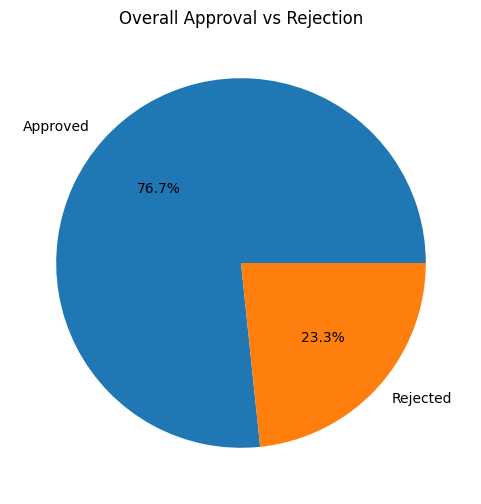

In [169]:
plt.figure(figsize=(6,6))
df["Approved"].value_counts().plot.pie(
    labels=["Approved","Rejected"],
    autopct="%1.1f%%",
)
plt.title("Overall Approval vs Rejection")
plt.ylabel("")
plt.show()


# Loan Income Ratio

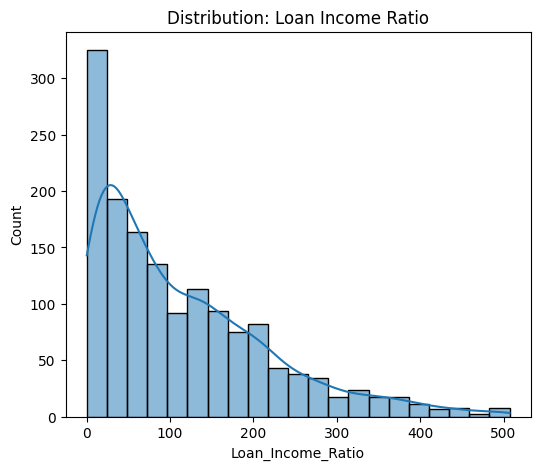

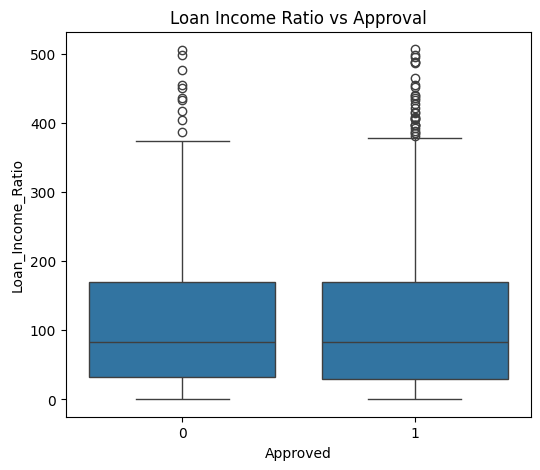

In [170]:
plt.figure(figsize=(6,5))
sns.histplot(df["Loan_Income_Ratio"], kde=True)
plt.title("Distribution: Loan Income Ratio")
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(data=df, x=target, y="Loan_Income_Ratio")
plt.title("Loan Income Ratio vs Approval")
plt.show()

In [171]:
df['EMI_Income_Ratio'] = df['EMI_amount'] / df['Monthly_income']   #EMI-to-Income Ratio

# EMI Income Ratio

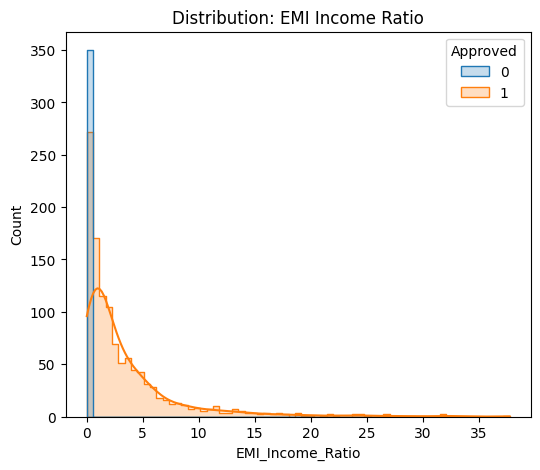

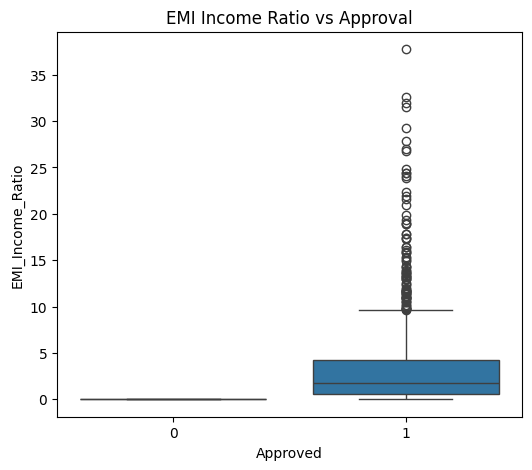

In [172]:
plt.figure(figsize=(6,5))
sns.histplot(data=df, x='EMI_Income_Ratio', hue='Approved', kde=True, element='step')
plt.title("Distribution: EMI Income Ratio")
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(data=df, x=target, y="EMI_Income_Ratio")
plt.title("EMI Income Ratio vs Approval")
plt.show()

# Fraud Risk

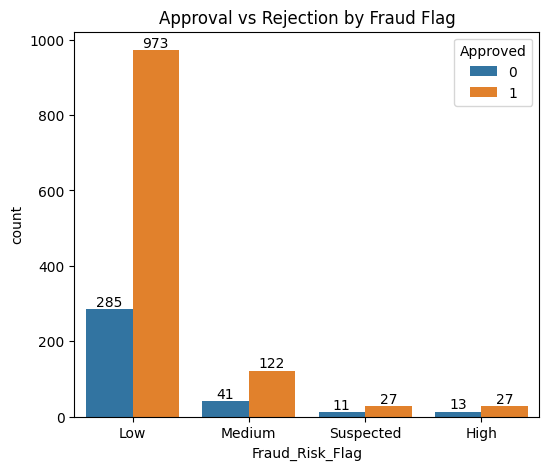

In [173]:
plt.figure(figsize=(6,5))
ax = sns.countplot(data=df, x='Fraud_Risk_Flag', hue='Approved')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Approval vs Rejection by Fraud Flag")
plt.show()


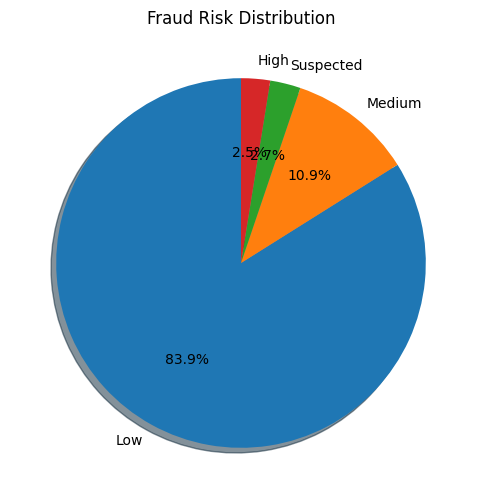

In [183]:
plt.figure(figsize=(6,6))
df['Fraud_Risk_Flag'].value_counts().plot.pie(
    labels=['Low', 'Medium','Suspected','High'],
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
plt.title("Fraud Risk Distribution")
plt.ylabel("")
plt.show()


# Loan vs Approval

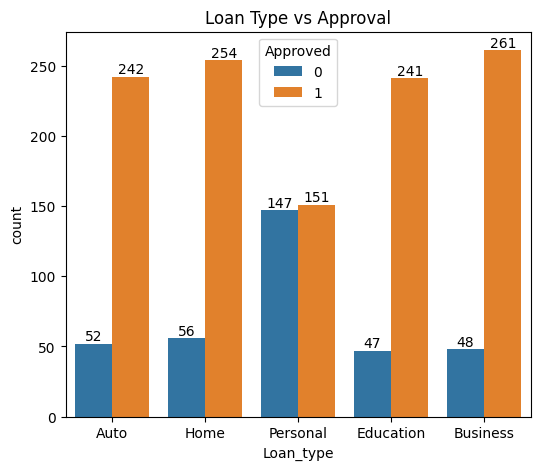

In [174]:
plt.figure(figsize=(6,5))
a=sns.countplot(data=df, x="Loan_type", hue=target)
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.title("Loan Type vs Approval")
plt.show()

# Applications by Year

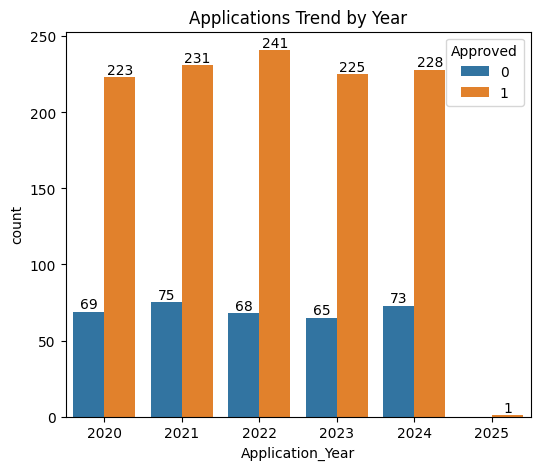

In [175]:
plt.figure(figsize=(6,5))
a = sns.countplot(data=df, x="Application_Year", hue=target)
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.title("Applications Trend by Year")
plt.show()

# Monthly Approval vs Rejection Count

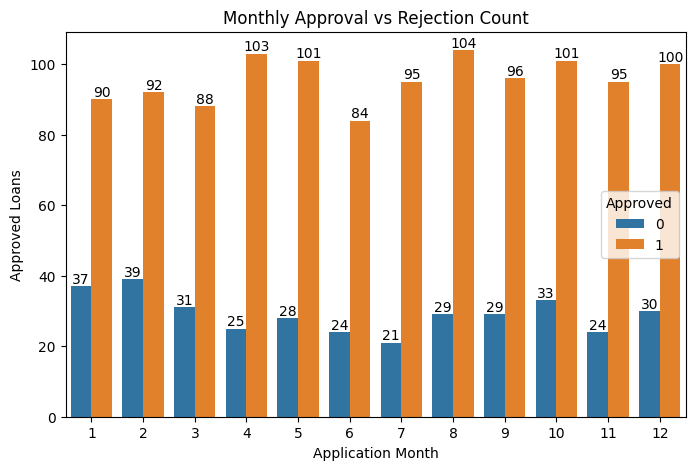

In [176]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='Application_Month', hue='Approved')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Monthly Approval vs Rejection Count")
plt.xlabel("Application Month")
plt.ylabel("Approved Loans")
plt.show()


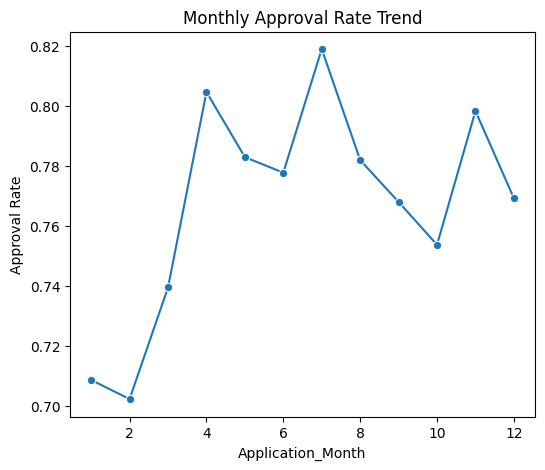

In [177]:
plt.figure(figsize=(6,5))
monthly_rate = df.groupby('Application_Month')['Approved'].mean().reset_index()

ax = sns.lineplot(data=monthly_rate, x='Application_Month', y='Approved', marker="o")
plt.title("Monthly Approval Rate Trend")
plt.ylabel("Approval Rate")
plt.show()


# Approval Across Tenure_Group

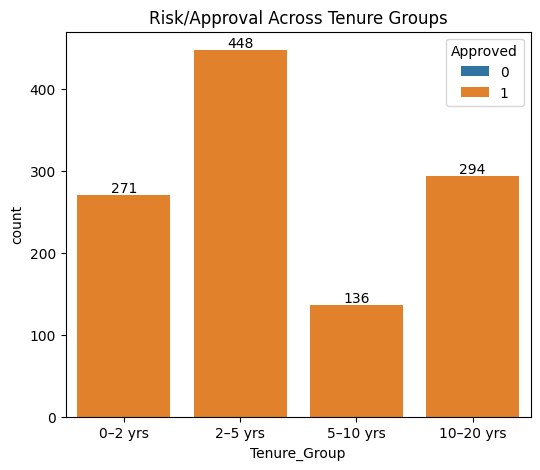

In [178]:
df['Tenure_Group'] = pd.cut(df['Tenure_months'],
                            bins=[0, 24, 60, 120, 240],
                            labels=['0–2 yrs', '2–5 yrs', '5–10 yrs', '10–20 yrs'])

plt.figure(figsize=(6,5))
ax = sns.countplot(data=df, x='Tenure_Group', hue='Approved')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Risk/Approval Across Tenure Groups")
plt.show()

In [179]:
# --------------------------------------------------------------
print("\n===== KEY DATA INSIGHTS =====")

if "Loan_Income_Ratio" in df.columns:
    print(f"* Avg Loan Income Ratio: {df['Loan_Income_Ratio'].mean():.2f}")
    
if "EMI_Income_Ratio" in df.columns:
    print(f"* Avg EMI Income Ratio: {df['EMI_Income_Ratio'].mean():.2f}")

print("\nEDA Completed Successfully!")


===== KEY DATA INSIGHTS =====
* Avg Loan Income Ratio: 114.74
* Avg EMI Income Ratio: 2.54

EDA Completed Successfully!
